In [1]:
import sys
sys.path.insert(0, "../../../../Dispatch-Bifrost/utilities/python")

import dispatch
import numpy as np
import pickle

In [71]:
import matplotlib.pyplot as plt

In [2]:
data = "data/orz/data"

In [ ]:
snap0 = dispatch.snapshot(0, data=data)
snap100 = dispatch.snapshot(100, data=data)

In [67]:
snap0data = {}
snap100data = {}

In [68]:
snap0keys = np.asarray(list(vars(snap0)))
snap100keys = np.asarray(list(vars(snap100)))


snap0data["keys"] = snap0keys
snap100data["keys"] = snap100keys

snap0data["npatches"] = len(snap0.patches)
snap100data["npatches"] = len(snap100.patches)

In [69]:
patches = [0, 3, 7, 15, 31]

ivs = ["d","lnd","logd","u1","u2","u3", \
        "ee","E","T","eth", "Eth", "ekin", "emag", "S", "b1", "b2", "b3"]
for patch in patches:
    patch_0 = snap0.patches[patch]
    patch_100 = snap100.patches[patch]
    patchId = f"patch_{patch_0.id}"
    snap0patchDict = {}
    snap100patchDict = {}

    for iv in ivs:
        snap0patchiv = patch_0.var(iv)
        assert patch_100.id == patch_0.id
        snap100patchiv = patch_100.var(iv)

        snap0patchDict[iv] = snap0patchiv
        snap100patchDict[iv] = snap100patchiv

    snap100patchDict["aux"] = {}
    snap100patchDict["aux"]["id"] = patch_100.aux.id
    snap100patchDict["aux"]["filename"] = patch_100.aux.filename
    snap100patchDict["aux"]["version"] = patch_100.aux.version
    snap100patchDict["aux"]["vars"] = patch_100.aux.vars
    
        
    
    snap0data[patchId] = snap0patchDict
    snap100data[patchId] = snap100patchDict
    snap100data["aux"] = {}
    snap100data["aux"]["select"] = snap100.aux.select



In [73]:
with open("data/snap0.obj", "wb") as f:
    pickle.dump(snap0data, f)

with open("data/snap100.obj", "wb") as f:
    pickle.dump(snap100data, f)

In [70]:
np.save("data/snap0", snap0data, allow_pickle=True)
np.save("data/snap100", snap100data, allow_pickle=True)

In [44]:
snap100.aux.select

['tt', 'pg', 'rkap', 'src', 'qout']

In [49]:
snap100.patches[0].aux.vars["pg"]

{'type': 'r3',
 'name': 'pg',
 'rank': 3,
 'shape': array([48, 48,  1], dtype=int32),
 'v': array([[[0.17727375],
         [0.183206  ],
         [0.18714516],
         ...,
         [0.12486529],
         [0.12628987],
         [0.12934555]],
 
        [[0.17422402],
         [0.1800339 ],
         [0.18358906],
         ...,
         [0.12442314],
         [0.12707649],
         [0.13008271]],
 
        [[0.17193602],
         [0.17628305],
         [0.17944139],
         ...,
         [0.12522873],
         [0.12751253],
         [0.1306155 ]],
 
        ...,
 
        [[0.19403476],
         [0.18943863],
         [0.18574439],
         ...,
         [0.13610475],
         [0.1330355 ],
         [0.13171615]],
 
        [[0.18648659],
         [0.1830178 ],
         [0.18016838],
         ...,
         [0.1301222 ],
         [0.12900506],
         [0.1304702 ]],
 
        [[0.18524109],
         [0.18234839],
         [0.18031551],
         ...,
         [0.12705314],
         [0.1

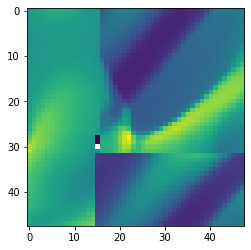

In [72]:
plt.imshow(snap100.patches[0].aux.vars["pg"]["v"])